In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Input1

In [34]:
img=cv2.imread('input1.jpg')

type(img)

img.shape 

(480, 480, 3)

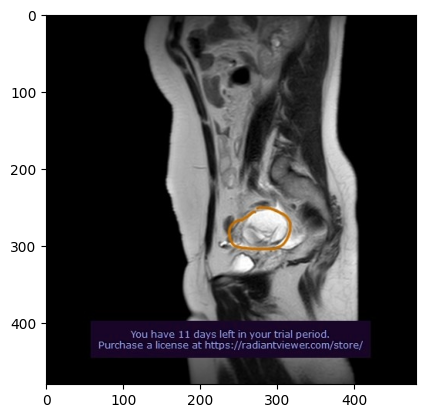

In [35]:
plt.imshow(img)
plt.show()

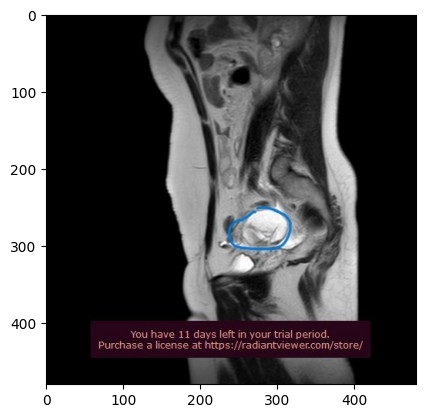

In [36]:
img_RGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img_RGB)
plt.show()

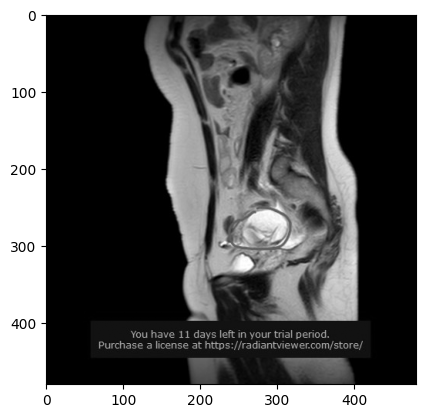

In [37]:
img_GRAY=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(img_GRAY,cmap='gray')
plt.show()

In [38]:
# Function to do nothing when the trackbar is used (placeholder)
def nothing(x):
    pass

# Load the image
image_path = 'input1.jpg'
image = cv2.imread(image_path)

# Convert the image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create a window to display the results
cv2.namedWindow('Trackbars')

# Create trackbars for adjusting the HSV range
cv2.createTrackbar('H Min', 'Trackbars', 0, 179, nothing)
cv2.createTrackbar('H Max', 'Trackbars', 179, 179, nothing) # Hue range in OpenCV is [0,179]
cv2.createTrackbar('S Min', 'Trackbars', 0, 255, nothing)
cv2.createTrackbar('S Max', 'Trackbars', 255, 255, nothing)
cv2.createTrackbar('V Min', 'Trackbars', 0, 255, nothing)
cv2.createTrackbar('V Max', 'Trackbars', 255, 255, nothing)

while True:
    # Get the current positions of the trackbars
    h_min = cv2.getTrackbarPos('H Min', 'Trackbars')
    h_max = cv2.getTrackbarPos('H Max', 'Trackbars')
    s_min = cv2.getTrackbarPos('S Min', 'Trackbars')
    s_max = cv2.getTrackbarPos('S Max', 'Trackbars')
    v_min = cv2.getTrackbarPos('V Min', 'Trackbars')
    v_max = cv2.getTrackbarPos('V Max', 'Trackbars')
    print(h_min,h_max,s_min,s_max,v_min,v_max)
    # Create a mask based on the current HSV range
    lower_hsv = np.array([h_min, s_min, v_min])
    upper_hsv = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)

    # Apply the mask to get the result
    # image=[100,10,0,50] mask=[1,0,0,1] --> result = [100,0,0,50]
    result = cv2.bitwise_and(image, image, mask=mask)

    # Display the original, mask, and result
    cv2.imshow('Original Image', image)
    cv2.imshow('Mask', mask)
    cv2.imshow('Filtered Image', result)


    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cv2.destroyAllWindows()



0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 25

In [39]:
#save the output image from the last run
cv2.imwrite('Output2.jpg', result)



True

In [40]:
img=cv2.imread('output2.jpg')
img_GRAY=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
image = img_GRAY.copy()


image = img_GRAY.copy()



kernel = np.ones((5, 5), np.uint8)

# Opening (Erosion followed by Dilation)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Display results
cv2.imshow('Original Image', image)
cv2.imshow('Opening', opening)

# Wait for a key press and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:


dilated_image = cv2.dilate(opening, kernel, iterations=10)
# Display results
cv2.imshow('Original Image', image)
cv2.imshow('Dilated Image', dilated_image)

# Wait for a key press and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
eroded_image = cv2.erode(dilated_image, kernel, iterations=10)
# Display results

cv2.imshow('Original Image', dilated_image)
cv2.imshow('Eroded Image', eroded_image)

# Wait for a key press and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

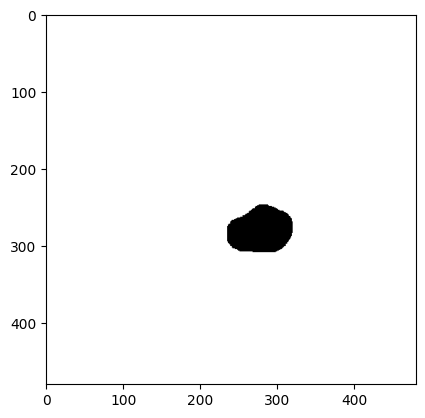

In [43]:
ret, img_bin = cv2.threshold(eroded_image, 50, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_bin,cmap='gray')
plt.show()

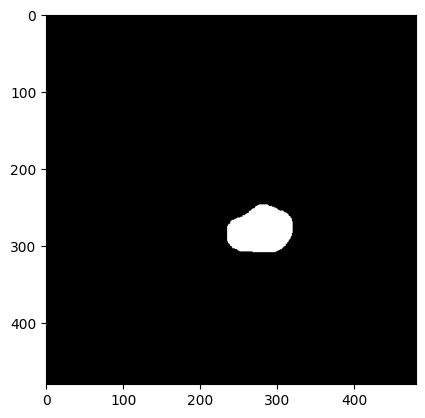

In [44]:
img_bin2=255-img_bin
plt.imshow(img_bin2,cmap='gray')   
plt.show()

In [45]:
cv2.imwrite('Final_output.jpg', img_bin2)

True

In [46]:
# Read the two images
img1 = cv2.imread('input1.jpg')
img2 = cv2.imread('Final_output.jpg')

# Make sure images have same height
height = min(img1.shape[0], img2.shape[0])
img1 = cv2.resize(img1, (int(img1.shape[1] * height/img1.shape[0]), height))
img2 = cv2.resize(img2, (int(img2.shape[1] * height/img2.shape[0]), height))

# Concatenate images horizontally
concatenated_img = np.hstack((img1, img2))

# Display result
cv2.imshow('Concatenated Images', concatenated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the concatenated image
cv2.imwrite('concatenated_output1.jpg', concatenated_img)





True

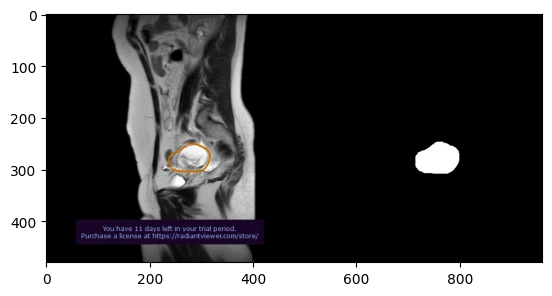

In [47]:
output_1=cv2.imread('concatenated_output1.jpg')
plt.imshow(output_1)
plt.show()

# input2

In [48]:
img=cv2.imread('input2.jpg')

type(img)

img.shape 

(512, 576, 3)

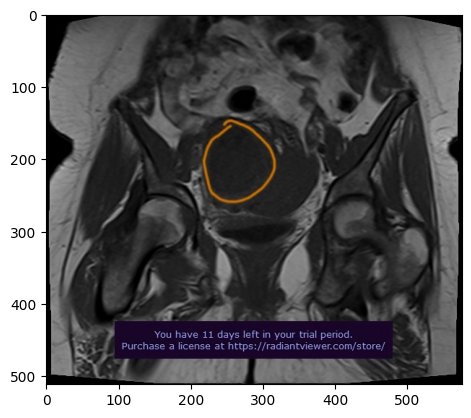

In [49]:
plt.imshow(img)
plt.show()

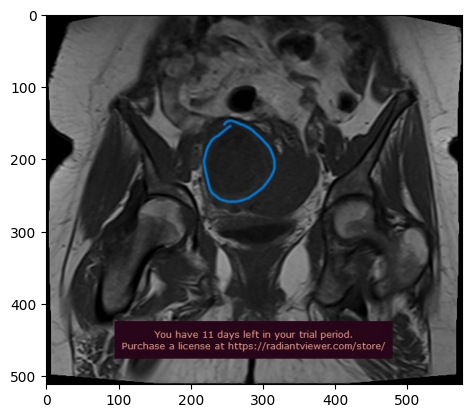

In [50]:
img_RGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img_RGB)
plt.show()

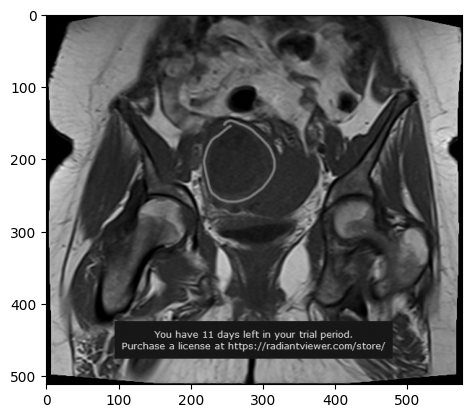

In [51]:
img_GRAY=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(img_GRAY,cmap='gray')
plt.show()

In [52]:
# Function to do nothing when the trackbar is used (placeholder)
def nothing(x):
    pass

# Load the image
image_path = 'input2.jpg'
image = cv2.imread(image_path)

# Convert the image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create a window to display the results
cv2.namedWindow('Trackbars')

# Create trackbars for adjusting the HSV range
cv2.createTrackbar('H Min', 'Trackbars', 0, 179, nothing)
cv2.createTrackbar('H Max', 'Trackbars', 179, 179, nothing) # Hue range in OpenCV is [0,179]
cv2.createTrackbar('S Min', 'Trackbars', 0, 255, nothing)
cv2.createTrackbar('S Max', 'Trackbars', 255, 255, nothing)
cv2.createTrackbar('V Min', 'Trackbars', 0, 255, nothing)
cv2.createTrackbar('V Max', 'Trackbars', 255, 255, nothing)

while True:
    # Get the current positions of the trackbars
    h_min = cv2.getTrackbarPos('H Min', 'Trackbars')
    h_max = cv2.getTrackbarPos('H Max', 'Trackbars')
    s_min = cv2.getTrackbarPos('S Min', 'Trackbars')
    s_max = cv2.getTrackbarPos('S Max', 'Trackbars')
    v_min = cv2.getTrackbarPos('V Min', 'Trackbars')
    v_max = cv2.getTrackbarPos('V Max', 'Trackbars')
    print(h_min,h_max,s_min,s_max,v_min,v_max)
    # Create a mask based on the current HSV range
    lower_hsv = np.array([h_min, s_min, v_min])
    upper_hsv = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)

    # Apply the mask to get the result
    # image=[100,10,0,50] mask=[1,0,0,1] --> result = [100,0,0,50]
    result = cv2.bitwise_and(image, image, mask=mask)

    # Display the original, mask, and result
    cv2.imshow('Original Image', image)
    cv2.imshow('Mask', mask)
    cv2.imshow('Filtered Image', result)


    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cv2.destroyAllWindows()



0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 25

In [53]:
#save the output image from the last run
cv2.imwrite('Output3.jpg', result)



True

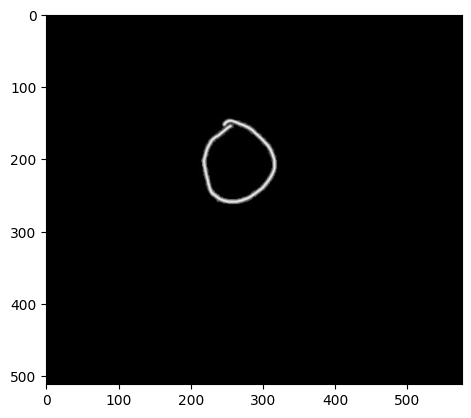

In [54]:
img=cv2.imread('output3.jpg')
img_GRAY=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
image = img_GRAY.copy()


image = img_GRAY.copy()


plt.imshow(image,cmap='gray')
plt.show()

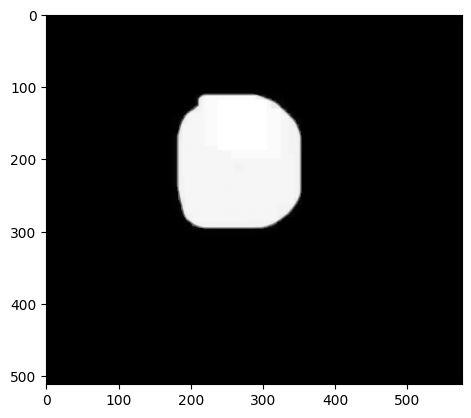

In [55]:
kernel = np.ones((5, 5), np.uint8)

dilated_image = cv2.dilate(image, kernel, iterations=17)
# Display results
plt.imshow(dilated_image,cmap='gray')
plt.show()

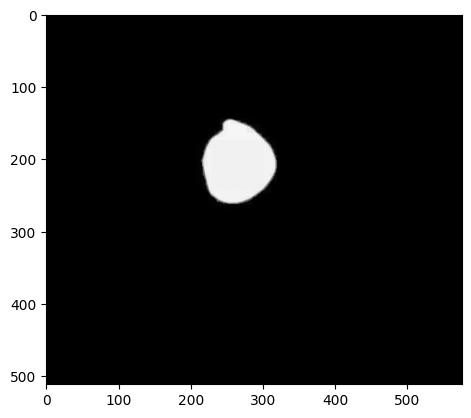

In [56]:
eroded_image = cv2.erode(dilated_image, kernel, iterations=17)
# Display results

plt.imshow(eroded_image,cmap='gray')
plt.show()

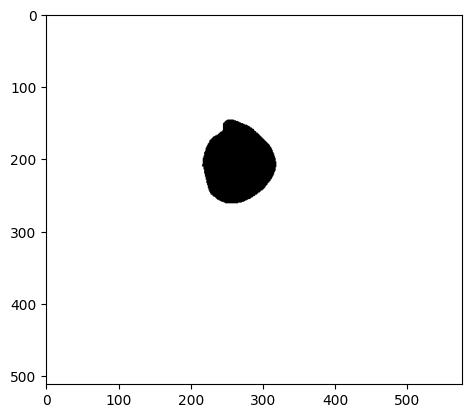

In [57]:
ret, img_bin = cv2.threshold(eroded_image, 50, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_bin,cmap='gray')
plt.show()

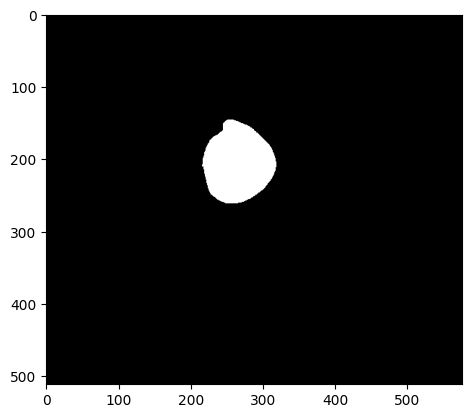

In [58]:
img_bin2=255-img_bin
plt.imshow(img_bin2,cmap='gray')   
plt.show()

In [59]:
cv2.imwrite('Final_output2.jpg', img_bin2)

True

In [60]:
# Read the two images
img1 = cv2.imread('input2.jpg')
img2 = cv2.imread('Final_output2.jpg')

# Make sure images have same height
height = min(img1.shape[0], img2.shape[0])
img1 = cv2.resize(img1, (int(img1.shape[1] * height/img1.shape[0]), height))
img2 = cv2.resize(img2, (int(img2.shape[1] * height/img2.shape[0]), height))

# Concatenate images horizontally
concatenated_img = np.hstack((img1, img2))

# Display result
cv2.imshow('Concatenated Images', concatenated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the concatenated image
cv2.imwrite('concatenated_output2.jpg', concatenated_img)





True

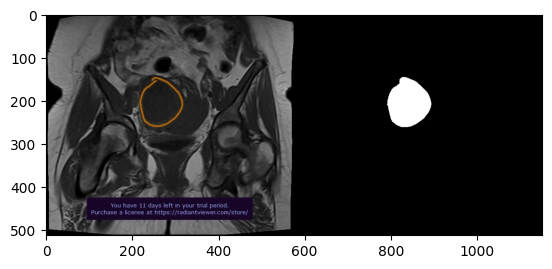

In [61]:
output_2=cv2.imread('concatenated_output2.jpg')
plt.imshow(output_2)
plt.show()